In [24]:
import matplotlib.pyplot as pl
import pyfolio as pf
import pandas as pd
import csv
import datetime
import pytz
from bs4 import BeautifulSoup
import codecs

In [66]:
%matplotlib inline

Convert MT4 test report to csv

In [60]:
def ConvHTM2CSV(htmPath, csvPath):
    csvCols = ["Time", "Type", "Order", "Size", "Price",
               "SL", "TP", "Profit", "Balance"]
    page = urllib.request.urlopen(htmPath)
    soup = BeautifulSoup(page, 'html.parser')
    table = soup.find_all('table')[1]
    fw = csv.writer(open(csvPath, "w"))
    fw.writerow(csvCols)
    x = len(table.findAll('tr')) - 1
    for row in table.findAll('tr')[1:x]:
        col = row.findAll('td')
        time = col[1].getText()
        typ = col[2].getText()
        order = col[3].getText()
        size = col[4].getText()
        price = col[5].getText()
        sl = col[6].getText()
        tp = col[7].getText()
        try:
            profit = col[8].getText()
            bal = col[9].getText()
        except:
            continue
        lineToAdd = (time, typ, order, size, price, sl, tp, profit, bal)
        fw.writerow(lineToAdd)

def lastValue(x):
    try:
        reply = x[-1]
    except:
        reply = None
    return reply

In [47]:
url = "file:///Users/PoFA/DEV-ALL/fxbacktester/data/mt4_sample/StrategyTester.htm"

In [48]:
fpo= '../data/mt4_sample/StrategyTester.csv'

In [49]:
ConvHTM2CSV(url, fpo)

In [55]:
rep = pd.read_csv(fpo, index_col=0,parse_dates=True, infer_datetime_format=True)

In [56]:
rep.head()

,Type,Order,Size,Price,SL,TP,Profit,Balance
Time,,,,,,,,
2000-01-03 02:50:00,t/p,1,0.89,1.01521,1.01082,1.01521,168.21,10168.21
2000-01-03 18:28:00,s/l,2,0.90,1.01900,1.01900,1.00440,-657.00,9511.21
2000-01-03 18:47:00,t/p,3,1.40,1.02121,1.00540,1.02121,280.00,9791.21
2000-01-04 12:32:00,t/p,4,0.86,1.03309,1.02130,1.03309,449.78,10240.99
2000-01-05 09:00:00,t/p,5,0.89,1.03700,1.02840,1.03700,260.77,10501.76


In [62]:
returns = pd.Series(data=rep.Balance,
                     index=rep.index).resample('D').apply(lastValue).pct_change(fill_method='pad').fillna(0).tz_localize('UTC')

In [69]:
dfRet = pd.DataFrame(data=returns)

In [72]:
dfRet.rename(columns={'Balance':'Adj Close'}, inplace=True)

In [74]:
returns.head(15)

Time
2000-01-03 00:00:00+00:00    0.000000
2000-01-04 00:00:00+00:00    0.045937
2000-01-05 00:00:00+00:00    0.025463
2000-01-06 00:00:00+00:00   -0.052607
2000-01-07 00:00:00+00:00    0.000000
2000-01-08 00:00:00+00:00    0.000000
2000-01-09 00:00:00+00:00    0.000000
2000-01-10 00:00:00+00:00    0.032305
2000-01-11 00:00:00+00:00    0.016036
2000-01-12 00:00:00+00:00    0.038761
2000-01-13 00:00:00+00:00    0.000000
2000-01-14 00:00:00+00:00   -0.056317
2000-01-15 00:00:00+00:00    0.000000
2000-01-16 00:00:00+00:00    0.000000
2000-01-17 00:00:00+00:00    0.031847
Freq: D, Name: Balance, dtype: float64

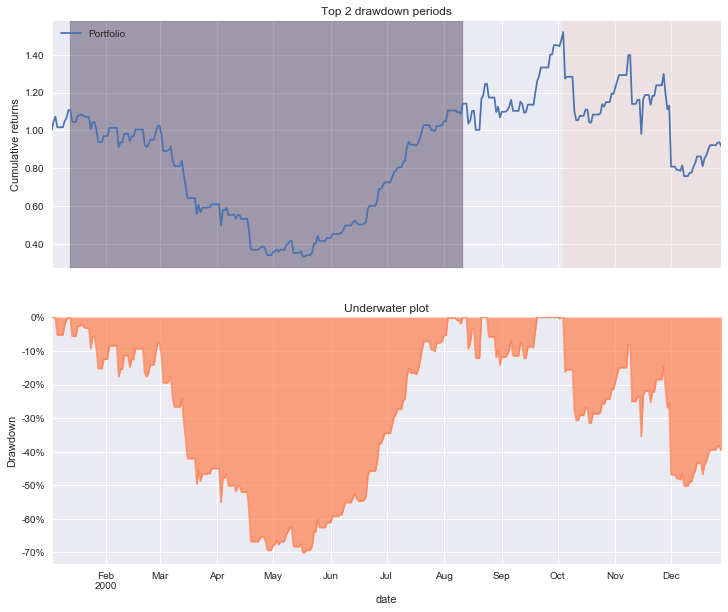

In [84]:
f, axs = pl.subplots(nrows=2, figsize=(12,10), sharex=True)
pf.plot_drawdown_periods(returns, ax=axs[0], top=2)
pf.plot_drawdown_underwater(returns, ax=axs[1]).set_xlabel('date');

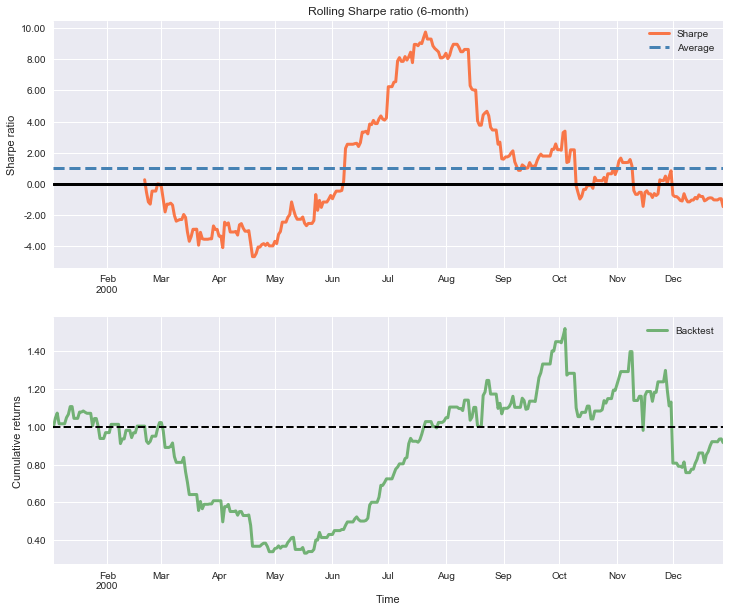

In [87]:
f, axs = pl.subplots(nrows=2, figsize=(12, 10))
pf.plot_rolling_sharpe(returns, ax=axs[0], rolling_window=50)
pf.plot_rolling_returns(returns, ax=axs[1])

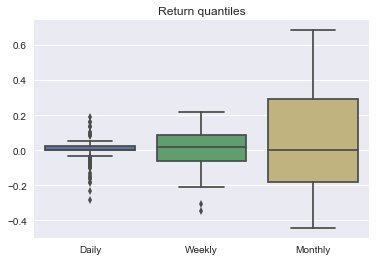

In [88]:
f, ax = pl.subplots(figsize=(10, 5))
pf.plot_return_quantiles(returns, ax=a);